#### Você trabalha como analista de dados em uma rede de franquias, como um ótimo profissional. Seeu gestor solicitou uma análise para avaliar o valor da franquia anual X o custo inicial.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# Carregar o arquivo
caminho = '../ArquivosAnálise/slr12.csv'

dados = pd.read_csv(caminho, sep=';')

#### Obter informações básicas do dataframe.

In [7]:
# Visualuzando o cabeçalho a primeira linha
dados.head(1)

,FrqAnual,CusInic
0,1000,1050


In [8]:
# Visualuzando o cabeçalho a ultima linha
dados.tail(1)

,FrqAnual,CusInic
35,850,1200


In [9]:
# Visualuzando as informações que contém no dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FrqAnual  36 non-null     int64
 1   CusInic   36 non-null     int64
dtypes: int64(2)
memory usage: 704.0 bytes


#### Análise exploratória dos dados.

In [11]:
# Verificar se há dados nulos e mostrar a quantidade;
dados.isnull().sum()

FrqAnual    0
CusInic     0
dtype: int64

In [12]:
# Resumo estatístico do dataframe;
dados.describe()

,FrqAnual,CusInic
count,36.000000,36.000000
mean,1134.777778,1291.055556
std,158.583211,124.058038
min,700.000000,1050.000000
25%,1080.000000,1250.000000
50%,1162.500000,1277.500000
75%,1250.000000,1300.000000
max,1375.000000,1830.000000


<Axes: xlabel='FrqAnual', ylabel='Count'>

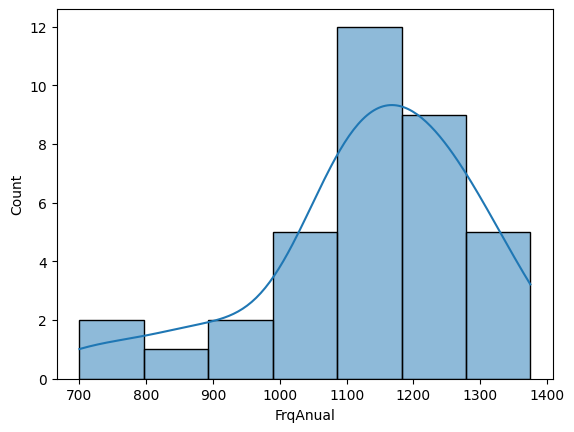

In [15]:
# CRIR UM HISTOGRAMA DA VARIÁVEL PREDITORA
# é usado para analisar a distribuição dos dados
sns.histplot(data=dados,x= 'FrqAnual', kde=True)

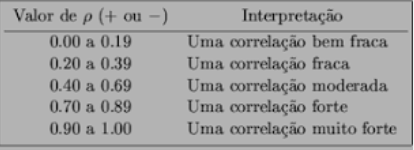

In [17]:
# Analisar a correlação entre as variáveis;
dados.corr()
# Nesse caso a correlação se mostra moderada

,FrqAnual,CusInic
FrqAnual,1.000000,0.477007
CusInic,0.477007,1.000000
